![](http://www.homecredit.net/~/media/Images/H/Home-Credit-Group/image-gallery/full/image-gallery-01-11-2016-b.png)

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Retrieving the Data</a>
- <a href='#3'>3. Glimpse of Data</a>
- <a href='#4'> 4. Check for missing data</a>

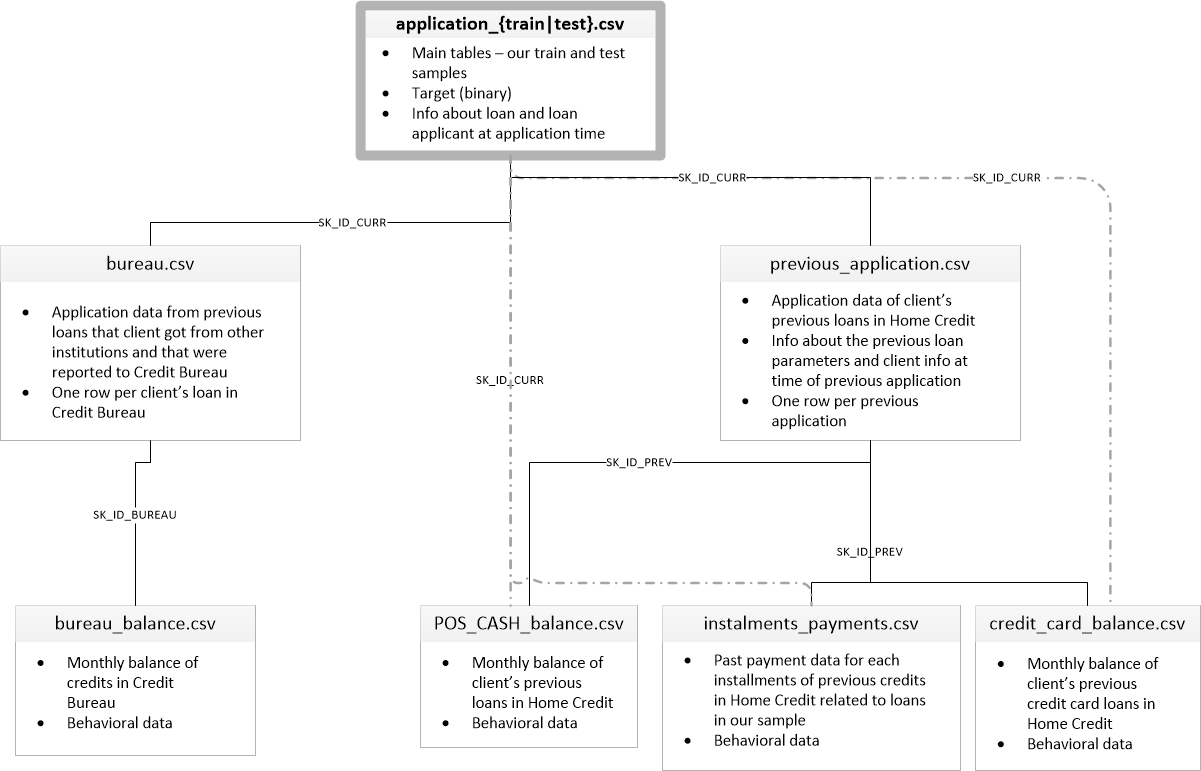

## <a id='1'>1. Introduction</a>

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

 ## <a id='2'>2. Retrieving the Data</a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

import cufflinks as cf
cf.go_offline()

In [ ]:
# import os
# print(os.listdir("../input"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
application_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/application_train.csv')
POS_CASH_balance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/POS_CASH_balance.csv')
bureau_balance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/bureau_balance.csv')
previous_application = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/previous_application.csv')
installments_payments = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/installments_payments.csv')
credit_card_balance = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/credit_card_balance.csv')
bureau = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/bureau.csv')
application_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Home Credit Default Risk/application_test.csv')

In [ ]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

## <a id='3'>3. Glimpse of Data</a>

**application_train data**

In [ ]:
application_train.head()

In [ ]:
application_train.columns.values

**POS_CASH_balance data**

In [ ]:
POS_CASH_balance.head()

**bureau_balance data**

In [ ]:
bureau_balance.head()

**previous_application data**

In [ ]:
previous_application.head()

In [ ]:
previous_application.columns.values

**installments_payments data**

In [ ]:
installments_payments.head()

**credit_card_balance data**

In [ ]:
credit_card_balance.head()

In [ ]:
credit_card_balance.columns.values

**bureau data**

In [ ]:
bureau.head()

## <a id='4'> 4. Check for missing data</a>

**checking missing data in application_train **

In [ ]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

**checking missing data in POS_CASH_balance **

In [ ]:
# checking missing data
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

**checking missing data in bureau_balance **

In [ ]:
# checking missing data
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

**checking missing data in previous_application **

In [ ]:
# checking missing data
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

**checking missing data in installments_payments **

In [ ]:
# checking missing data
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

**checking missing data in credit_card_balance **

In [ ]:
# checking missing data
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

**checking missing data in bureau **

In [ ]:
# checking missing data
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)